In [1]:

import pandas as pd
import yfinance as yf
from pathlib import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import hvplot.pandas 
from matplotlib import style
import seaborn as sns
%matplotlib inline
import plotly.express as px
import panel as pn
pn.extension('plotly')
from panel.interact import interact
from panel import widgets
import ipywidgets as widgets
from ipywidgets import *
import pandas_datareader as web
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from datetime import datetime
import plotly.graph_objects as go
import datetime as dt

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
tickers = ['BCH-USD', 'BTC-USD', 'ETH-USD','GC=F', 'SI=F', '^GSPC']

data = yf.download(tickers, period="2y")['Adj Close']

data.columns = ['Bitcoin_Cash','Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500' ]
data.fillna(method='ffill', inplace=True)

data.tail()

[*********************100%***********************]  6 of 6 completed


,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500
Date,,,,,,
2021-09-25,517.896545,42716.593750,2925.565674,1749.699951,22.388000,4455.479980
2021-09-26,503.667419,43208.539062,3062.265381,1749.699951,22.388000,4455.479980
2021-09-27,489.011932,42235.730469,2934.138916,1750.000000,22.657000,4443.109863
2021-09-28,474.522003,41034.542969,2807.296631,1735.800049,22.430000,4352.629883
2021-09-29,480.827332,41423.671875,2825.859619,1724.900024,21.540001,4377.009766


In [ ]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = data.pct_change()
daily_returns.hvplot.table()

:Table   [Date,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500]

In [ ]:
#Describe daily returns
daily_returns.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Bitcoin_Cash,1529.0,0.002861,0.075905,-0.429560,-0.029098,-0.001258,0.028955,0.539684
Bitcoin,1826.0,0.003183,0.041458,-0.371695,-0.014465,0.002393,0.020911,0.252472
Etherum,1826.0,0.004531,0.056359,-0.423472,-0.020723,0.001399,0.028268,0.336621
Gold,1826.0,0.000175,0.007579,-0.049787,-0.001516,0.000000,0.002586,0.059477
Silver,1826.0,0.000182,0.015197,-0.116491,-0.003140,0.000000,0.004266,0.092862
SP500,1826.0,0.000439,0.009977,-0.119841,-0.001012,0.000000,0.002872,0.093828


In [ ]:
columns=['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500']
daily_returns.hvplot.box(y=columns, group_label='Ticker', legend=False, value_label='Daily Returns', invert=True)

:BoxWhisker   [Ticker]   (Daily Returns)

In [ ]:
# Cumulative Returns
cum_returns = ((data.pct_change()+1).cumprod())
cum_returns.hvplot.table(width=600, backlog=10)

:Table   [Date,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500]

In [ ]:

# Visualize Cumulative Returns
cum_returns.hvplot.line().opts(legend_position = 'bottom')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500
Bitcoin_Cash,1.000000,0.561221,0.644456,0.067948,0.082575,0.116504
Bitcoin,0.561221,1.000000,0.651623,0.089464,0.106303,0.170571
Etherum,0.644456,0.651623,1.000000,0.081990,0.110064,0.180094
Gold,0.067948,0.089464,0.081990,1.000000,0.787999,0.071913
Silver,0.082575,0.106303,0.110064,0.787999,1.000000,0.162002
SP500,0.116504,0.170571,0.180094,0.071913,0.162002,1.000000


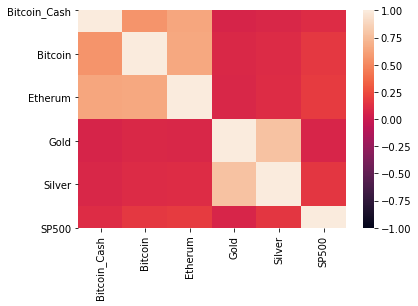

In [ ]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
portfolio_std = daily_returns.std()
portfolio_std

Bitcoin_Cash    0.075905
Bitcoin         0.041458
Etherum         0.056359
Gold            0.007579
Silver          0.015197
SP500           0.009977
dtype: float64

In [ ]:
portfolio_std[(portfolio_std['SP500'] < portfolio_std)]

Bitcoin_Cash    0.075905
Bitcoin         0.041458
Etherum         0.056359
Silver          0.015197
dtype: float64

In [ ]:
volatility = daily_returns.std() * np.sqrt(504)
volatility.sort_values(inplace=True)
volatility

Gold            0.120320
SP500           0.158377
Silver          0.241250
Bitcoin         0.658130
Etherum         0.894678
Bitcoin_Cash    1.204958
dtype: float64

In [ ]:
for item in data:
    covariance = daily_returns[item].cov(daily_returns['SP500'])
    variance = daily_returns['SP500'].var()
    beta = round(covariance / variance, 2)
    print(item, ":", beta)

Bitcoin_Cash : 0.96
Bitcoin : 0.71
Etherum : 1.02
Gold : 0.05
Silver : 0.25
SP500 : 1.0


In [ ]:
sharpe_ratios = (daily_returns.mean() * 504) / (daily_returns.std() * np.sqrt(504))
sharpe_ratios

Bitcoin_Cash    0.598370
Bitcoin         1.218900
Etherum         1.276145
Gold            0.365621
Silver          0.190096
SP500           0.698816
dtype: float64

In [ ]:
sharpe_ratios.hvplot.bar(figsize=[15,10], title="Sharpe Ratios")

:Bars   [index]   (0)

In [ ]:
cov_matrix_annual = daily_returns.cov() * 504
cov_matrix_annual

,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500
Bitcoin_Cash,1.451925,0.452546,0.649395,0.010118,0.024832,0.023992
Bitcoin,0.452546,0.433135,0.383685,0.007084,0.016878,0.017779
Etherum,0.649395,0.383685,0.800449,0.008826,0.023756,0.025519
Gold,0.010118,0.007084,0.008826,0.014477,0.022873,0.001370
Silver,0.024832,0.016878,0.023756,0.022873,0.058202,0.006190
SP500,0.023992,0.017779,0.025519,0.001370,0.006190,0.025083


In [ ]:
weights = np.array([0.1, 0.2, 0.1, 0.2, 0.1, 0.3])
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09923115086847872

In [ ]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.31500976313199996

In [ ]:

# Expected Annual Return
portfolioSimpleAnnualReturn = np.sum(daily_returns.mean()*weights) * 504
portfolioSimpleAnnualReturn

0.393301230638543

In [ ]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'

print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 39.0%
Annual volatility/standard deviation/risk : 32.0%
Annual variance : 10.0%


In [ ]:
print(data.columns)

weights = np.array(np.random.random(6))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((daily_returns.mean()*weights)*504)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*504, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500'], dtype='object')
Random Weights:
[0.18884785 0.19208982 0.05074562 0.88256554 0.14358688 0.89411712]
Rebalance
[0.08029406 0.08167248 0.02157595 0.37524798 0.06105007 0.38015946]
Expected Portfolio Return
0.20942638413860473
Expected Volatility
0.18551445907350997
Sharpe Ratio
1.1288952094867155


In [ ]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(6)) 
    weights = weights/np.sum(weights)  
    	
    # save the weights
    all_weights[ind,:] = weights
	    
    # expected return 
    ret_arr[ind] = np.sum((daily_returns.mean()*weights)*504)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*504, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
import holoviews as hv

'''
scatter = hv.Scatter((vol_arr, ret_arr, sharpe_arr), 'Volatility', ['Return', 'Sharpe Ratio'])
#max_sharpe = hv.Scatter([(max_sr_vol, max_sr_ret)])

scatter.opts(color='Sharpe Ratio', cmap='plasma', width=600, height=400, colorbar=True, padding=0.1) *\
max_sharpe.opts(color='red', line_color='black', size=10)
'''

NameError: name 'max_sharpe' is not defined

In [ ]:
from scipy.optimize import minimize

def get_ret_vol_sr(weights): 
    weights = np.array(weights)
    ret = np.sum((daily_returns.mean()*weights)*504)
    vol = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*504, weights)))
    sr = ret/vol 
    return np.array([ret,vol,sr])


# minimize negative Sharpe Ratio
def neg_sharpe(weights): 
	return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights): 
	return np.sum(weights) - 1

cons = ({'type':'eq','fun': check_sum})

bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0,1), (0,1))


# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,weights,method='SLSQP',bounds=bounds,constraints=cons)
opt_results.x

get_ret_vol_sr(opt_results.x)

frontier_y = np.linspace(0.1,0.8,100) 
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]


frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,weights,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])


scatter*hv.Curve((frontier_volatility, frontier_y)).opts(color='green', line_dash='dashed')


:Overlay
   .Scatter.I :Scatter   [Volatility]   (Return,Sharpe Ratio)
   .Curve.I   :Curve   [x]   (y)

In [ ]:

def portfolio():
    
    fig = go.Figure()
    # Add Traces
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Bitcoin_Cash),
                   name="Bitcoin_Cash",
                   line=dict(color="firebrick")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Bitcoin),
                   name="Bitcoin",
                   line=dict(color="royalblue")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Etherum),
                   name="Etherum",
                   line=dict(color="#33CFC5")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Gold),
                   name="Gold",
                   line=dict(color="#636363")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Silver),
                   name="Silver",
                   line=dict(color="LightSeaGreen")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.SP500),
                   name="SP500",
                   line=dict(color="#ff7f0e")))


    fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label="All Stocks",
                         method="update",
                         args=[{"visible": [True, True, True, True, True, True]}]),
                    dict(label="Bitcoin_Cash",
                         method="update",
                         args=[{"visible": [True, False, False, False, False, False]}]),
                    dict(label="Bitcoin",
                         method="update",
                         args=[{"visible": [False, True, False, False, False, False]}]),
                    dict(label="Etherum",
                         method="update",
                         args=[{"visible": [False, False, True, False, False, False]}]),
                    dict(label="Gold",
                         method="update",
                         args=[{"visible": [False, False, False, True, False, False]}]),
                    dict(label="Silver",
                         method="update",
                         args=[{"visible": [False, False, False, False, True, False]}]),
                    dict(label="SP500",
                         method="update",
                         args=[{"visible": [False, False, False, False, False, True]}])
                ]),
            )
        ])
    # Set title
    fig.update_layout(title_text="Portfolio")

    return fig 

# Daily returns
def daily_returns():
    daily_returns = data.pct_change()
    columns=['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500']
    new_daily_returns = daily_returns.hvplot.box(y=columns, group_label='Ticker', legend=False, value_label='Daily Returns', invert=True)
    
    return new_daily_returns

# Cumulative returns
def cumulative_returns():
    cum_returns = ((data.pct_change()+1).cumprod())
    cum_returns.hvplot.table(width=600, backlog=10)
    new_cum_returns = cum_returns.hvplot.line().opts(legend_position = 'bottom')
    
    return new_cum_returns


# Sharpe ratios
def sharpe_ratios():
    daily_returns = data.pct_change()
    sharpe_ratios = (daily_returns.mean() * 504) / (daily_returns.std() * np.sqrt(504))
    new_sharpe = sharpe_ratios.hvplot.bar(figsize=[15,10], title="Sharpe Ratios")
    
    return new_sharpe

# Correlation
def correlation():
    daily_returns = data.pct_change()
    correlation = daily_returns.corr()
    new_graph = sns.heatmap(correlation, vmin=-1, vmax=1)
    
    return correlation

# Volatility
def volatility():
    daily_returns = data.pct_change()
    
    num_ports = 5000
    all_weights = np.zeros((num_ports, len(data.columns)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)

    for ind in range(num_ports): 
        # weights 
        weights = np.array(np.random.random(6)) 
        weights = weights/np.sum(weights)  
            
        # save the weights
        all_weights[ind,:] = weights
            
        # expected return 
        ret_arr[ind] = np.sum((daily_returns.mean()*weights)*504)

        # expected volatility 
        vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*504, weights)))
        
        # Sharpe Ratio 
        sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
        all_weights[1600,:]
    
    plt.figure(figsize=(12,8))
    plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    


    max_sr_ret = ret_arr[1600]
    max_sr_vol = vol_arr[1600]
    scatter = hv.Scatter((vol_arr, ret_arr, sharpe_arr), 'Volatility', ['Return', 'Sharpe Ratio'])
    max_sharpe = hv.Scatter([(max_sr_vol,max_sr_ret)])

    scatter.opts(color='Sharpe Ratio', cmap='plasma', width=600, height=400, colorbar=True, padding=0.1) *\
    max_sharpe.opts(color='red', line_color='black', size=10)
    
    return max_sharpe

In [ ]:
tab_1 = pn.Column(
    '##Assets/Portfolio',
    portfolio,
    daily_returns)

tab_2 = pn.Column(
    '##Portfolio Analysis',
    correlation,
    sharpe_ratios)

tab_3 = pn.Column(
    '##Portfolio Optimization',
    volatility)

tab_1

NameError: name 'combined_df' is not defined

In [ ]:
panel = pn.Tabs(
    ("Assets/Portfolio", tab_1),
    ("Portfolio Analysis", tab_2),
    ("Portfolio Optimization", tab_3))

In [ ]:
panel.servable()